##### LINE BOT 串接 OpenAI ChatGPT ( 讓 AI 回覆訊息 )
已經可以使用 Python 開發 LINE BOT 之後，就能再繼續搭配 OpenAI ChatGPT 的 API，當接收到指定的訊息時，透過 AI 機器人進行自動回覆的動作。

##### 本篇文章所需知識 
要實作本篇文章的範例，需要先參考以下文章，先建立自己的 LINE BOT 以及註冊 OpenAI 帳號。
* [建立 LINE Channel](https://steam.oxxostudio.tw/category/python/example/line-developer.html)
* [使用 OpenAI](https://steam.oxxostudio.tw/category/python/example/openai.html)

如果已經有帳號或專案，直接點擊下方連結開始。
* [Google Dialogflow](https://dialogflow.cloud.google.com/)
* [LINE Developers](https://developers.line.biz/zh-hant/)
* [LINE 官方帳號管理頁面](https://tw.linebiz.com/login/)

##### 使用的 LINE BOT 程式 
參考「自動回覆訊息」文章，使用 Anaconda Jupyter 或本機環境執行下方的程式碼，並搭配 ngrok 服務，建立 LINE Webhook URL，\
執行後發送訊息到 LINE BOT，應該就能看到 LINE BOT 回覆一模一樣的訊息。
* [參考：建立並串接 Webhook](https://steam.oxxostudio.tw/category/python/example/line-webhook.html)

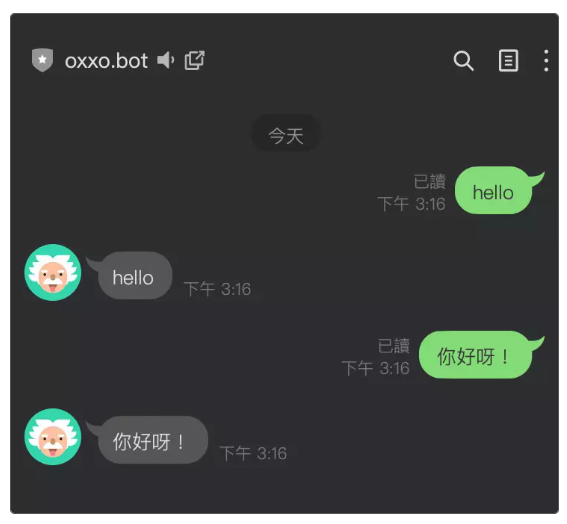

In [ ]:
from flask_ngrok import run_with_ngrok   # colab 使用，本機環境請刪除
from flask import Flask, request
from linebot import LineBotApi, WebhookHandler
from linebot.models import TextSendMessage   # 載入 TextSendMessage 模組
import json

app = Flask(__name__)

@app.route("/", methods=['POST'])
def linebot():
    body = request.get_data(as_text=True)
    json_data = json.loads(body)
    print(json_data)
    try:
        line_bot_api = LineBotApi('你的 Channel access token')
        handler = WebhookHandler('你的 LINE Channel secret')
        signature = request.headers['X-Line-Signature']
        handler.handle(body, signature)
        tk = json_data['events'][0]['replyToken']         # 取得 reply token
        msg = json_data['events'][0]['message']['text']   # 取得使用者發送的訊息
        text_message = TextSendMessage(text=msg)          # 設定回傳同樣的訊息
        line_bot_api.reply_message(tk,text_message)       # 回傳訊息
    except:
        print('error')
    return 'OK'

if __name__ == "__main__":
    run_with_ngrok(app)   # colab 使用，本機環境請刪除
    app.run()

##### 加入 OpenAI ChatGPT，讓 AI 回覆訊息 
參考「使用 ngrok 服務」，註冊 OpenAI 並產生 ChatGPT API Key 之後，修改程式，加入判斷「Hi AI:」開頭的文字，\
當文字的開頭出現「Hi AI:」的字串時 ( 透過程式全部轉成小寫 )，就讓 OpenAI 進行回覆，否則就仍然回傳相同的字串。

從下圖與 LINE BOT 的對話中可以看出，如果開頭沒有 hi ai 的聊天訊息，就會採用一模一樣的訊息回覆，如果開頭有 hi ai 的聊天訊息，就會讓 OpenAI 進行回覆。

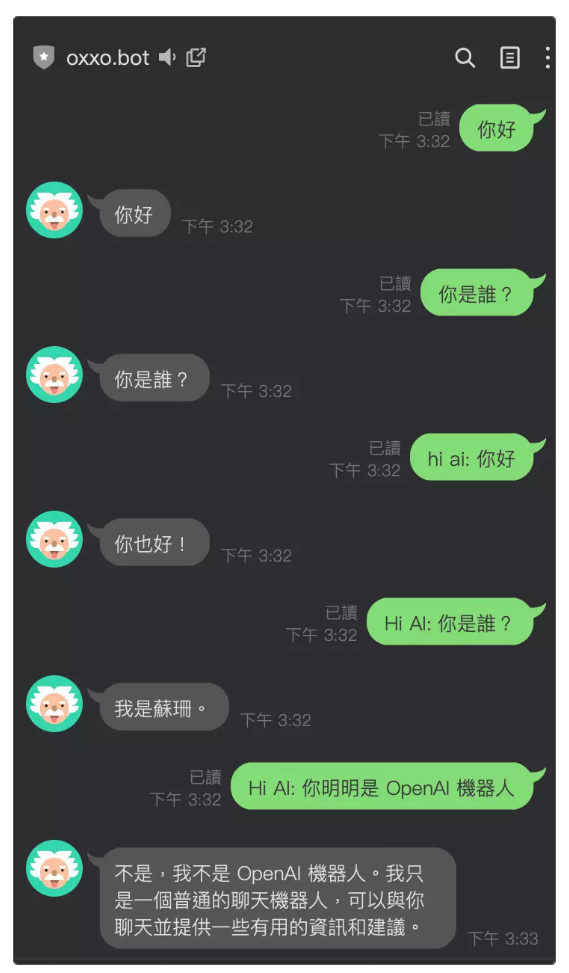

In [ ]:
import openai

from flask_ngrok import run_with_ngrok   # colab 使用，本機環境請刪除
from flask import Flask, request

# 載入 LINE Message API 相關函式庫
from linebot import LineBotApi, WebhookHandler
from linebot.models import TextSendMessage   # 載入 TextSendMessage 模組
import json

app = Flask(__name__)

@app.route("/", methods=['POST'])
def linebot():
    body = request.get_data(as_text=True)
    json_data = json.loads(body)
    print(json_data)
    try:
        line_bot_api = LineBotApi('你的 Channel access token')
        handler = WebhookHandler('你的 Channel secret ')
        signature = request.headers['X-Line-Signature']
        handler.handle(body, signature)
        tk = json_data['events'][0]['replyToken']
        msg = json_data['events'][0]['message']['text']
        # 取出文字的前五個字元，轉換成小寫
        ai_msg = msg[:6].lower()
        reply_msg = ''
        # 取出文字的前五個字元是 hi ai:
        if ai_msg == 'hi ai:':
            openai.api_key = '你的 OpenAI API Key'
            # 將第六個字元之後的訊息發送給 OpenAI
            response = openai.Completion.create(
                model='text-davinci-003',
                prompt=msg[6:],
                max_tokens=256,
                temperature=0.5,
                )
            # 接收到回覆訊息後，移除換行符號
            reply_msg = response["choices"][0]["text"].replace('\n','')
        else:
            reply_msg = msg
        text_message = TextSendMessage(text=reply_msg)
        line_bot_api.reply_message(tk,text_message)
    except:
        print('error')
    return 'OK'

if __name__ == "__main__":
    run_with_ngrok(app)   # colab 使用，本機環境請刪除
    app.run()

##### 小結 
結合了 OpenAI 的 LINE BOT，已經能夠滿足基本「聊天機器人」的需求，但因為聊天的對象是 OpenAI 的 AI 機器人，所以回答的資訊可能不見得是所想的結果，\
建議可以再進一步搭配程式邏輯的判斷，或是透過 Dialogflow 的語意判斷，才能做出真正有幫助的 LINE 聊天機器人。